# Vision Tasks with MLX Server and OpenAI API

This notebook demonstrates how to use the MLX Server with OpenAI-compatible API for various vision-based tasks:
1. Text extraction from images
2. Visual question answering
3. Object identification in images

## Setup and Imports

First, we'll import the necessary libraries and establish a connection to the MLX Server.

In [17]:
# Import the OpenAI client for API communication
from openai import OpenAI

# Connect to the local MLX Server with OpenAI-compatible API
client = OpenAI(
    base_url="http://localhost:8000/v1",
    api_key="fake-api-key",
)


In [18]:
# Required for image processing
from PIL import Image
import base64
from io import BytesIO

In [19]:
# To send images to the API, we need to convert them to base64-encoded strings in a data URI format.

def image_to_base64(image: Image.Image):
    """
    Convert a PIL Image to a base64-encoded data URI string that can be sent to the API.
    
    Args:
        image: A PIL Image object
        
    Returns:
        A data URI string with the base64-encoded image
    """
    # Convert image to bytes
    buffer = BytesIO()
    image.save(buffer, format="PNG")
    buffer.seek(0)
    image_data = buffer.getvalue()
    
    # Encode as base64
    image_base64 = base64.b64encode(image_data).decode('utf-8')
    
    # Create the data URI format required by the API
    mime_type = "image/png"  
    image_uri = f"data:{mime_type};base64,{image_base64}"
    
    return image_uri

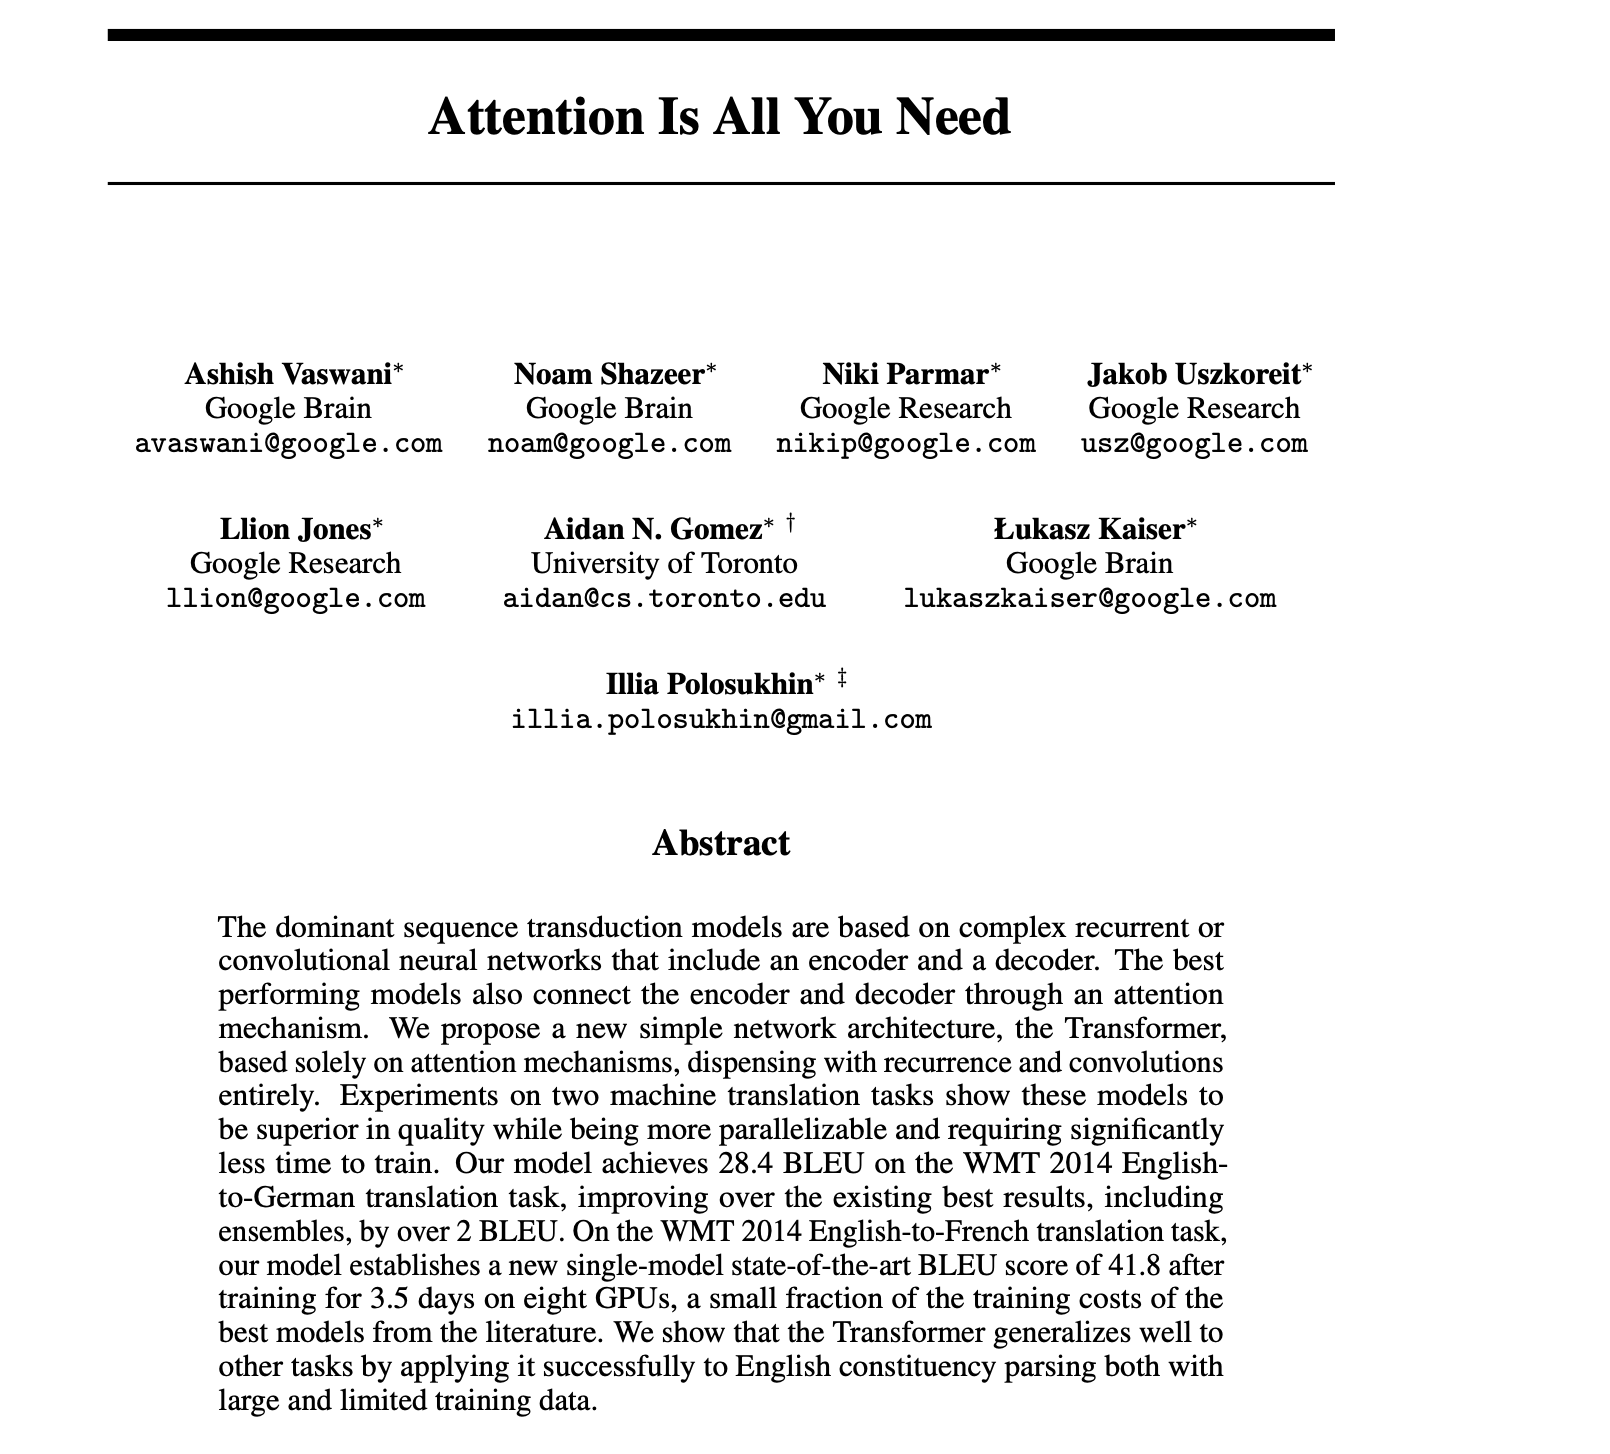

In [20]:
# Load the image with academic paper information
image = Image.open("images/attention.png")

# Display the image to see what we're working with
display(image)


### Example 1: Text Extraction from an Image

In this example, we'll extract text from an academic paper image, focusing on the authors and their affiliations.

In [21]:
# Convert the image to base64 format
image_uri = image_to_base64(image)

# Make an API request to extract text from the image
response = client.chat.completions.create(
    model="gemma3-27b",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that can extract text from an image."
        },
        {
            "role": "user", "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": image_uri
                }
            },
            {
                "type": "text",
                "text": "Extract all authors from the image with their affiliations in a beautiful formated text."
            }
        ]
        }
    ],
    max_tokens=1024
)

# Display the model's response
print(response.choices[0].message.content)

Here's the extracted author list with their affiliations, formatted for readability:

**Authors & Affiliations**

*   **Ashish Vaswani** - Google Brain (avaswani@google.com)
*   **Noam Shazeer** - Google Research (noam@google.com)
*   **Niki Parmar** - Google Research (nikip@google.com)
*   **Jakob Uszkoreit** - Google Research (usz@google.com)
*   **Llion Jones** - Google Research (llion@google.com)
*   **Aidan N. Gomez** - University of Toronto (aidan@cs.toronto.edu)
*   **Łukasz Kaiser** - Google Brain (lukaszkaiser@google.com)
*   **Illia Polosukhin** - Google (illia.polosukhin@gmail.com)


### Example 2: Visual Question Answering - Object Identification

In this example, we'll ask the model to identify an animal on a candy wrapper.

In [22]:
candy_image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/p-blog/candy.JPG"

# Make a visual question answering API request
response = client.chat.completions.create(
    model="gemma3-27b",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that can answer questions about an image."
        },
        {
            "role": "user", "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": candy_image_url
                    }
                },
                {
                    "type": "text",
                    "text": "What animal is on the candy?"
                }
            ]
        }
    ],
    max_tokens=1024
)

# Display the model's response
print(response.choices[0].message.content)

Based on the image, the animal on the candy appears to be a **turtle**. Specifically, it's visible on the teal-colored candy.


### Example 3: Visual Question Answering - Reading Text

In this example, we'll ask the model to read a password from an image.

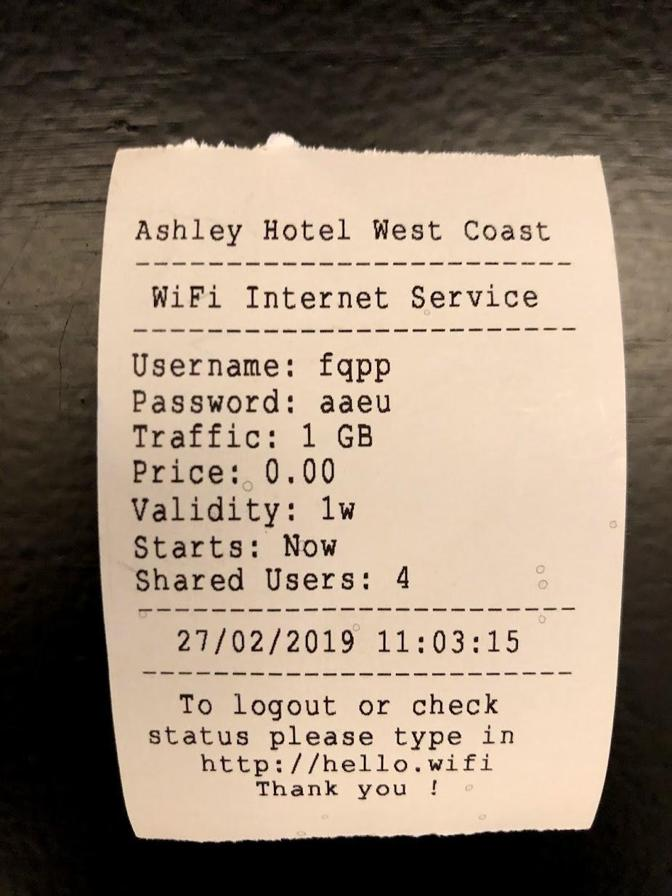

In [23]:
# Load the password image
image3 = Image.open("images/password.jpg")

# Display the image
display(image3)

In [24]:
# Convert the image to base64 format
image_uri3 = image_to_base64(image3)

# Make a visual question answering API request
response = client.chat.completions.create(
    model="gemma3-27b",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_uri3
                    }
                },
                {
                    "type": "text",
                    "text": """
                    Extract the wifi internet service provider information (including username and password) from the image and return it in the following stringified JSON format:
                    {
                        "username": "string",
                        "password": "string"
                    }
                    Ensure that the extracted values are accurate and correctly mapped to the respective keys. If there are any ambiguities in the image, provide the most plausible interpretation of the information."""
                }
            ]
        }
    ],
    max_tokens=1024
)

# Display the model's response
print(response.choices[0].message.content)

```json
{
    "username": "fqpp",
    "password": "aaeu"
}
```


## Conclusion

In this notebook, we've demonstrated three different vision-based tasks using the MLX Server with OpenAI-compatible API:

1. Extracting structured text from an academic paper image
2. Identifying objects in an image through visual question answering
3. Reading text from an image through visual question answering

The Gemma 3 27B model performs well on these vision tasks when accessed through the MLX Server's OpenAI-compatible API interface.